In [26]:
from matplotlib import pyplot as plt
import numpy as np
from numpy import ndarray
import pandas as pd
from pandas import DataFrame
from pathlib import Path

In [10]:
PROJECT_ROOT = Path.cwd().parent
BENCHMARK_DIR = PROJECT_ROOT/"benchmarks"

In [47]:
tcrdist_results = pd.read_csv(BENCHMARK_DIR/"tcrdist"/"one_shot.csv")
levenshtein_results = pd.read_csv(BENCHMARK_DIR/"CDR3 Levenshtein"/"one_shot.csv")

In [48]:
tcrdist_results

,epitope,mean_auc,std_auc,median_auc,upper_quantile_0.75,lower_quantile_0.25
0,GILGFVFTL,0.810178,0.127372,0.865754,0.876220,0.840339
1,NLVPMVATV,0.485343,0.052181,0.491517,0.524205,0.447298
2,GLCTLVAML,0.687993,0.127396,0.756513,0.794628,0.579569
3,YLQPRTFLL,0.640209,0.125437,0.691455,0.749729,0.536977
4,LLWNGPMAV,0.755651,0.119342,0.815596,0.837730,0.693948
5,CINGVCWTV,0.577251,0.125748,0.590845,0.691610,0.485500
6,QYIKWPWYI,0.512035,0.078307,0.505945,0.575661,0.451285
7,TFEYVSQPFLMDLE,0.913860,0.142328,0.951996,0.955077,0.945969
8,LTDEMIAQY,0.509737,0.046872,0.512331,0.538424,0.477655
9,TTDPSFLGRY,0.564165,0.050378,0.560898,0.603787,0.527708


In [49]:
def calc_err(results_df: DataFrame) -> ndarray:
    upper_error = results_df["upper_quantile_0.75"] - results_df["median_auc"]
    lower_error = results_df["median_auc"] - results_df["lower_quantile_0.25"]
    return np.array([upper_error.to_numpy(), lower_error.to_numpy()])

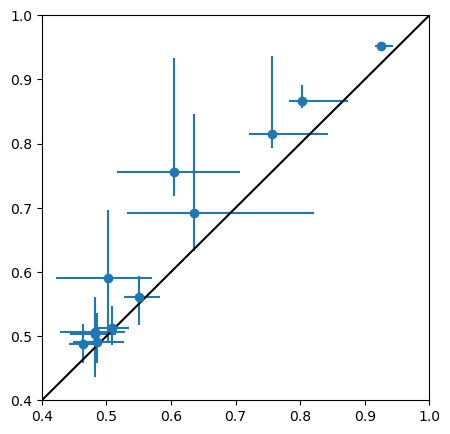

In [50]:
plt.figure(figsize=(5,5))

plt.errorbar(x=levenshtein_results["median_auc"], y=tcrdist_results["median_auc"], xerr=calc_err(levenshtein_results), yerr=calc_err(tcrdist_results), fmt="o")
plt.plot([0,1],[0,1],c="k")
plt.xlim(0.4,1)
plt.ylim(0.4,1)

plt.show()